In [1]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
#import matplotlib.style as style; style.use('fivethirtyeight')
from collections import OrderedDict
%matplotlib inline

# Checking Leverage and Influence Points
from statsmodels.graphics.regressionplots import *
import statsmodels.stats.stattools as stools
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import scipy.stats as scipystats
import statsmodels.api as sm

# Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Cluster analysis
from sklearn.cluster import KMeans

# Feature importance
import eli5
from eli5.sklearn import PermutationImportance

# Modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.svm import SVR
import xgboost as xgb

# Metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, space_eval
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.utils import resample

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

random_state = 2019
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

G:\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
G:\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
G:\conda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
G:\conda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a

In [2]:
data= pd.read_excel('C:/Users/mypc/Desktop/文献/第二部分数据/试验用数据/会凝土/Concrete_Data.xls')

In [3]:
#data= pd.read_excel('C:/Users/mypc/Desktop/文献/第二部分数据/试验用数据/会凝土/Concrete_c.xls')

In [3]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
data= data.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [5]:
data = data[['cement', 'slag', 'ash', 'water', 'fineagg', 'age', 'strength']]

In [6]:
#data = data[['Cement', 'Slag', 'Ash', 'Water', 'Fine', 'Age', 'Strength']]

data = data[['mean_atomic_mass', 'wtd_gmean_atomic_mass', 'std_atomic_mass',
       'gmean_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius',
       'range_atomic_radius', 'mean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'std_Density',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'gmean_FusionHeat', 'wtd_range_FusionHeat',
       'wtd_std_FusionHeat', 'gmean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'gmean_Valence', 'wtd_std_Valence','critical_temp']]

In [6]:
#print('Separating the dependents and independents + Scaling the data'); print('--'*60)
#features_list = list(data.columns)
#data = data.apply(zscore); data = pd.DataFrame(data , columns = features_list)
#display(data.describe())

X = data.drop('strength', axis = 1); y = data['strength']; 
X = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2019)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 6), (309, 6), (721,), (309,))

In [7]:
#print('Separating the dependents and independents + Scaling the data'); print('--'*60)
#features_list = list(data.columns)
#data = data.apply(zscore); data = pd.DataFrame(data , columns = features_list)
#display(data.describe())

X = data.drop('Strength', axis = 1); y = data['Strength']; 
X = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2019)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 6), (309, 6), (721,), (309,))

In [7]:
from sklearn import metrics
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [8]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [9]:
svm = SVR( )
xgb = XGBRegressor(max_depth=6)
lr =  LinearRegression()
las = Lasso(alpha = 0.01)
rr = Ridge(alpha = 0.01)
knn= KNeighborsRegressor(n_neighbors=1)
dt= DecisionTreeRegressor(random_state = random_state,)
rf= RandomForestRegressor(random_state = random_state)
adb= AdaBoostRegressor(random_state = random_state)
gb = GradientBoostingRegressor(random_state = random_state)
etr = ExtraTreesRegressor(random_state = random_state)
cat = CatBoostRegressor(iterations = 1143, subsample=0.61,od_type = 'Iter',bootstrap_type='Bernoulli',od_wait = 5,l2_leaf_reg= 0.02,depth= 4,rsm= 0.57,loss_function= 'RMSE',grow_policy= 'Depthwise',eval_metric= 'RMSE',learning_rate= 0.02)
#cat = CatBoostRegressor(iterations = None, random_state = 1000, od_type = 'Iter', od_wait = 5)
mlp = MLPRegressor(hidden_layer_sizes=(100,),
                                 activation='relu',
                                 solver='adam',
                                 alpha=0.0001,
                                 batch_size='auto',
                                 learning_rate='constant',
                                 learning_rate_init=0.001,
                                 power_t=0.5,
                                 max_iter=1000,
                                 shuffle=True,
                                 random_state=1,
                                 tol=0.0001,
                                 verbose=False,
                                 warm_start=False,
                                 momentum=0.9,
                                 nesterovs_momentum=True,
                                 early_stopping=False,
                                 validation_fraction=0.1,
                                 beta_1=0.9, beta_2=0.999,
                                 epsilon=1e-08)


In [11]:
stack = StackingCVRegressor(regressors=(knn,las,etr,xgb),
                            meta_regressor=cat, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=10)

stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print(score)

0:	learn: 16.1813156	total: 1.58ms	remaining: 1.8s
1:	learn: 15.9272293	total: 3.45ms	remaining: 1.97s
2:	learn: 15.6813177	total: 5.25ms	remaining: 1.99s
3:	learn: 15.4221518	total: 6.71ms	remaining: 1.91s
4:	learn: 15.1723391	total: 8.36ms	remaining: 1.9s
5:	learn: 14.9749745	total: 9.93ms	remaining: 1.88s
6:	learn: 14.7357425	total: 11.6ms	remaining: 1.88s
7:	learn: 14.5356775	total: 12.7ms	remaining: 1.8s
8:	learn: 14.3133471	total: 14.2ms	remaining: 1.79s
9:	learn: 14.0820489	total: 15.9ms	remaining: 1.8s
10:	learn: 13.8545536	total: 17.5ms	remaining: 1.8s
11:	learn: 13.6298337	total: 19.3ms	remaining: 1.82s
12:	learn: 13.4244966	total: 21ms	remaining: 1.83s
13:	learn: 13.2175450	total: 22.3ms	remaining: 1.79s
14:	learn: 13.0122009	total: 23.9ms	remaining: 1.8s
15:	learn: 12.8106477	total: 25.6ms	remaining: 1.8s
16:	learn: 12.6391431	total: 27.3ms	remaining: 1.8s
17:	learn: 12.4351455	total: 28.8ms	remaining: 1.8s
18:	learn: 12.2373148	total: 30.5ms	remaining: 1.8s
19:	learn: 12.0

237:	learn: 3.8879403	total: 342ms	remaining: 1.3s
238:	learn: 3.8857764	total: 344ms	remaining: 1.3s
239:	learn: 3.8816475	total: 345ms	remaining: 1.3s
240:	learn: 3.8761561	total: 346ms	remaining: 1.3s
241:	learn: 3.8735723	total: 348ms	remaining: 1.29s
242:	learn: 3.8717603	total: 349ms	remaining: 1.29s
243:	learn: 3.8676330	total: 350ms	remaining: 1.29s
244:	learn: 3.8618842	total: 352ms	remaining: 1.29s
245:	learn: 3.8553920	total: 353ms	remaining: 1.29s
246:	learn: 3.8529666	total: 355ms	remaining: 1.29s
247:	learn: 3.8510095	total: 357ms	remaining: 1.29s
248:	learn: 3.8486484	total: 358ms	remaining: 1.29s
249:	learn: 3.8426163	total: 360ms	remaining: 1.28s
250:	learn: 3.8400737	total: 361ms	remaining: 1.28s
251:	learn: 3.8380745	total: 362ms	remaining: 1.28s
252:	learn: 3.8359728	total: 364ms	remaining: 1.28s
253:	learn: 3.8322406	total: 365ms	remaining: 1.28s
254:	learn: 3.8304013	total: 366ms	remaining: 1.28s
255:	learn: 3.8287724	total: 368ms	remaining: 1.27s
256:	learn: 3.82

473:	learn: 3.1500286	total: 689ms	remaining: 973ms
474:	learn: 3.1473257	total: 691ms	remaining: 972ms
475:	learn: 3.1451954	total: 693ms	remaining: 971ms
476:	learn: 3.1420251	total: 694ms	remaining: 969ms
477:	learn: 3.1393193	total: 696ms	remaining: 968ms
478:	learn: 3.1338372	total: 697ms	remaining: 966ms
479:	learn: 3.1318299	total: 699ms	remaining: 965ms
480:	learn: 3.1293879	total: 701ms	remaining: 965ms
481:	learn: 3.1269363	total: 703ms	remaining: 964ms
482:	learn: 3.1217957	total: 705ms	remaining: 963ms
483:	learn: 3.1183637	total: 707ms	remaining: 962ms
484:	learn: 3.1161113	total: 708ms	remaining: 961ms
485:	learn: 3.1132447	total: 710ms	remaining: 959ms
486:	learn: 3.1106732	total: 711ms	remaining: 958ms
487:	learn: 3.1059045	total: 714ms	remaining: 958ms
488:	learn: 3.1036965	total: 717ms	remaining: 958ms
489:	learn: 3.1004779	total: 719ms	remaining: 958ms
490:	learn: 3.0972480	total: 720ms	remaining: 956ms
491:	learn: 3.0916679	total: 722ms	remaining: 955ms
492:	learn: 

660:	learn: 2.6675342	total: 1.01s	remaining: 738ms
661:	learn: 2.6649692	total: 1.01s	remaining: 737ms
662:	learn: 2.6641168	total: 1.02s	remaining: 736ms
663:	learn: 2.6628704	total: 1.02s	remaining: 734ms
664:	learn: 2.6597709	total: 1.02s	remaining: 732ms
665:	learn: 2.6566409	total: 1.02s	remaining: 731ms
666:	learn: 2.6555902	total: 1.02s	remaining: 729ms
667:	learn: 2.6530803	total: 1.02s	remaining: 728ms
668:	learn: 2.6507321	total: 1.02s	remaining: 726ms
669:	learn: 2.6472100	total: 1.03s	remaining: 724ms
670:	learn: 2.6457214	total: 1.03s	remaining: 723ms
671:	learn: 2.6442165	total: 1.03s	remaining: 721ms
672:	learn: 2.6419322	total: 1.03s	remaining: 720ms
673:	learn: 2.6407456	total: 1.03s	remaining: 718ms
674:	learn: 2.6396795	total: 1.03s	remaining: 716ms
675:	learn: 2.6374553	total: 1.03s	remaining: 715ms
676:	learn: 2.6350770	total: 1.04s	remaining: 713ms
677:	learn: 2.6338784	total: 1.04s	remaining: 712ms
678:	learn: 2.6312624	total: 1.04s	remaining: 710ms
679:	learn: 

888:	learn: 2.2755957	total: 1.35s	remaining: 385ms
889:	learn: 2.2737028	total: 1.35s	remaining: 383ms
890:	learn: 2.2718678	total: 1.35s	remaining: 382ms
891:	learn: 2.2700607	total: 1.35s	remaining: 380ms
892:	learn: 2.2668674	total: 1.35s	remaining: 379ms
893:	learn: 2.2657459	total: 1.35s	remaining: 377ms
894:	learn: 2.2645479	total: 1.36s	remaining: 376ms
895:	learn: 2.2635777	total: 1.36s	remaining: 374ms
896:	learn: 2.2619145	total: 1.36s	remaining: 373ms
897:	learn: 2.2598294	total: 1.36s	remaining: 371ms
898:	learn: 2.2583332	total: 1.36s	remaining: 370ms
899:	learn: 2.2571951	total: 1.36s	remaining: 368ms
900:	learn: 2.2548037	total: 1.36s	remaining: 367ms
901:	learn: 2.2535105	total: 1.37s	remaining: 365ms
902:	learn: 2.2521699	total: 1.37s	remaining: 364ms
903:	learn: 2.2503607	total: 1.37s	remaining: 362ms
904:	learn: 2.2483292	total: 1.37s	remaining: 361ms
905:	learn: 2.2470446	total: 1.37s	remaining: 359ms
906:	learn: 2.2461437	total: 1.37s	remaining: 358ms
907:	learn: 

1099:	learn: 1.9784521	total: 1.68s	remaining: 65.8ms
1100:	learn: 1.9773127	total: 1.69s	remaining: 64.3ms
1101:	learn: 1.9762636	total: 1.69s	remaining: 62.8ms
1102:	learn: 1.9735142	total: 1.69s	remaining: 61.2ms
1103:	learn: 1.9726763	total: 1.69s	remaining: 59.7ms
1104:	learn: 1.9711391	total: 1.69s	remaining: 58.2ms
1105:	learn: 1.9700874	total: 1.69s	remaining: 56.6ms
1106:	learn: 1.9687289	total: 1.69s	remaining: 55.1ms
1107:	learn: 1.9681305	total: 1.7s	remaining: 53.6ms
1108:	learn: 1.9672827	total: 1.7s	remaining: 52ms
1109:	learn: 1.9656877	total: 1.7s	remaining: 50.5ms
1110:	learn: 1.9650634	total: 1.7s	remaining: 49ms
1111:	learn: 1.9641271	total: 1.7s	remaining: 47.4ms
1112:	learn: 1.9633553	total: 1.7s	remaining: 45.9ms
1113:	learn: 1.9623546	total: 1.71s	remaining: 44.4ms
1114:	learn: 1.9615134	total: 1.71s	remaining: 42.9ms
1115:	learn: 1.9606022	total: 1.71s	remaining: 41.3ms
1116:	learn: 1.9592517	total: 1.71s	remaining: 39.8ms
1117:	learn: 1.9577605	total: 1.71s	re

In [12]:
y_test

949    17.96
28     37.43
837    39.05
533    11.65
716    10.09
72     33.40
521    24.13
403    59.00
863    42.13
145    69.30
714     8.37
468    52.96
363    63.53
687    47.78
756    74.17
626     9.99
1010   40.06
845    57.21
186    24.89
651     4.90
20     41.84
821    20.77
492    45.90
424    33.01
874    36.80
612    25.97
347    46.64
832    19.99
707    43.25
753    67.31
67     30.28
175    79.30
139    63.40
905    13.29
1020   42.14
400    67.87
235    17.84
112    56.10
123    60.29
0      79.99
993    33.42
929    21.91
639    43.70
607    18.42
559    39.44
456    43.39
855    61.23
118    60.29
142    64.90
391    55.65
180    73.30
646    47.71
237    47.13
597    31.38
27     52.12
26     41.15
962    13.20
33     42.13
318    45.37
826    24.39
399    39.30
261    37.40
731    15.87
169    65.20
247    39.59
859    15.09
19     42.62
222    28.63
865    41.54
478    52.01
969    39.42
110    38.00
166    62.50
537    43.94
735    40.86
249    13.82
550    27.74

In [13]:
pd.DataFrame(pred).to_excel('G:/毕业论文/R/pred.xls')

In [14]:
pd.DataFrame(y_test).to_excel('G:/毕业论文/R/test.xls')

In [15]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

stacking model
loss is 19.259252696688556


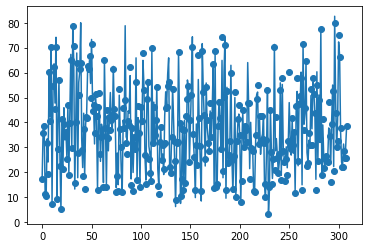

In [35]:
print('stacking model')
print("loss is {}".format(mean_squared_error(y_test, pred)))
plt.scatter(np.arange(len(pred)), pred)
plt.plot(np.arange(len(y_test)), y_test)
plt.show()


In [16]:
r2_test = r2_score(y_test, pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred))
MAE=mean_absolute_error(y_test,pred)
MSE=mean_squared_error(y_test,pred)

In [17]:
print(r2_test)
print(RMSE)
print(MAE)
print(MSE)

0.9306595346110921
4.523610001050998
3.011257468065086
20.463047441608612


In [15]:
y_train_pred = stack.predict(X_train)

In [16]:
r2_test2 = r2_score(y_train, y_train_pred)
RMSE2=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
MAE2=mean_absolute_error(y_train,y_train_pred)
MSE2=mean_squared_error(y_train,y_train_pred)

In [17]:
print(r2_test2)
print(RMSE2)
print(MAE2)
print(MSE2)

0.9823760241427402
2.183400560861822
1.3427126079261307
4.76723800917172
